# Powering Tetouan: Time Series Forecasting on Power Consumption in Quads, Smir and Boussafou zones.

In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import xgboost as xgb

In [198]:
df = pd.read_csv('sample_data.csv')

In [199]:
df.head()

,Datetime,predicted_Zone1,predicted_Zone2,predicted_Zone3
0,2/12/2017 14:40,30000,10000,20000
1,11/22/2017 15:30,30000,10000,20000
2,10/15/2017 1:50,30000,10000,20000
3,9/11/2017 23:00,30000,10000,20000
4,12/26/2017 1:20,30000,10000,20000


In [200]:
train = pd.read_csv('train_data.csv')

In [201]:
train.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,5/5/2017 22:30,17.84,55.42,4.920,0.099,0.089,39168.00000,24375.23220,23675.46559
1,5/5/2017 21:30,18.71,49.68,4.919,0.048,0.130,43272.39344,25723.83901,24730.68826
2,4/11/2017 16:40,15.76,85.70,0.068,200.700,182.800,32489.12809,18084.31772,17716.36364
3,9/30/2017 21:40,19.19,83.60,4.919,0.073,0.122,40218.05310,23864.03326,19198.03882
4,1/5/2017 10:40,8.82,65.24,0.084,322.500,40.380,31552.40506,20739.20973,15226.98795


In [202]:
from datetime import datetime

train['Datetime'] = train['Datetime'].apply(lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M"))



In [203]:
train.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-05-05 22:30:00,17.84,55.42,4.920,0.099,0.089,39168.00000,24375.23220,23675.46559
1,2017-05-05 21:30:00,18.71,49.68,4.919,0.048,0.130,43272.39344,25723.83901,24730.68826
2,2017-04-11 16:40:00,15.76,85.70,0.068,200.700,182.800,32489.12809,18084.31772,17716.36364
3,2017-09-30 21:40:00,19.19,83.60,4.919,0.073,0.122,40218.05310,23864.03326,19198.03882
4,2017-01-05 10:40:00,8.82,65.24,0.084,322.500,40.380,31552.40506,20739.20973,15226.98795


In [204]:
train.tail()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
41927,2017-02-27 02:40:00,14.89,56.81,0.081,0.051,0.111,22600.67797,13542.85714,14408.68342
41928,2017-04-18 10:50:00,19.48,49.29,0.086,732.000,59.810,34770.80732,20492.87169,17815.27273
41929,2017-08-18 17:30:00,27.57,54.98,0.067,317.800,76.000,37615.80466,25519.32418,26892.03762
41930,2017-04-27 00:40:00,14.21,71.80,0.082,0.026,0.167,26722.92788,15085.53971,17396.36364
41931,2017-02-22 05:30:00,13.48,67.66,0.083,0.059,0.178,25425.76271,12729.48328,14130.81407


In [205]:
train = train.set_index('Datetime')


In [206]:
train.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,,,,,,
2017-05-05 22:30:00,17.84,55.42,4.920,0.099,0.089,39168.00000,24375.23220,23675.46559
2017-05-05 21:30:00,18.71,49.68,4.919,0.048,0.130,43272.39344,25723.83901,24730.68826
2017-04-11 16:40:00,15.76,85.70,0.068,200.700,182.800,32489.12809,18084.31772,17716.36364
2017-09-30 21:40:00,19.19,83.60,4.919,0.073,0.122,40218.05310,23864.03326,19198.03882
2017-01-05 10:40:00,8.82,65.24,0.084,322.500,40.380,31552.40506,20739.20973,15226.98795


In [207]:
train = train.sort_index()

In [208]:
train.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:50:00,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048


In [209]:
train.dtypes

Temperature               float64
Humidity                  float64
WindSpeed                 float64
GeneralDiffuseFlows       float64
DiffuseFlows              float64
PowerConsumption_Zone1    float64
PowerConsumption_Zone2    float64
PowerConsumption_Zone3    float64
dtype: object

In [210]:
train.describe()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,41932.000000,41932.000000,41932.000000,41932.000000,41932.000000,41932.000000,41932.000000,41932.000000
mean,18.794223,68.322970,1.958469,181.852878,75.093093,32320.339175,21026.447763,17818.976229
std,5.816396,15.550517,2.348605,263.567443,124.152443,7132.268087,5198.438443,6615.433440
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.380000,58.367500,0.078000,0.062000,0.122000,26275.404260,16964.133740,13104.578310
50%,18.770000,69.940000,0.086000,4.895500,4.318000,32234.913770,20802.910600,16409.233910
75%,22.860000,81.500000,4.915000,317.200000,101.300000,37274.569030,24683.207865,21580.023753
max,39.780000,94.800000,6.483000,1163.000000,933.000000,52204.395120,37408.860760,47598.326360


In [211]:
train.index

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:10:00',
               '2017-01-01 00:20:00', '2017-01-01 00:30:00',
               '2017-01-01 00:50:00', '2017-01-01 01:00:00',
               '2017-01-01 01:10:00', '2017-01-01 01:40:00',
               '2017-01-01 01:50:00', '2017-01-01 02:00:00',
               ...
               '2017-12-30 22:10:00', '2017-12-30 22:20:00',
               '2017-12-30 22:30:00', '2017-12-30 22:40:00',
               '2017-12-30 22:50:00', '2017-12-30 23:00:00',
               '2017-12-30 23:10:00', '2017-12-30 23:20:00',
               '2017-12-30 23:40:00', '2017-12-30 23:50:00'],
              dtype='datetime64[ns]', name='Datetime', length=41932, freq=None)

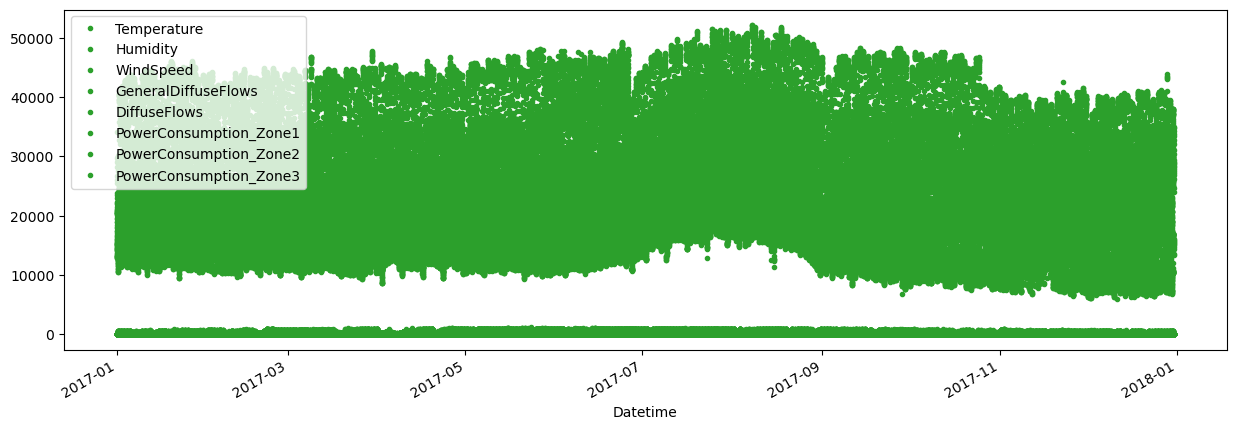

In [212]:
color_pal = sns.color_palette()
train.plot(style='.', figsize=(15, 5),
           color=color_pal[2],
           )
plt.show()

In [213]:
train.duplicated().sum()

0

In [214]:
train.isnull().sum()

Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

In [215]:
train.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2',
       'PowerConsumption_Zone3'],
      dtype='object')

## Outliers Analysis and removal


<AxesSubplot:ylabel='Frequency'>

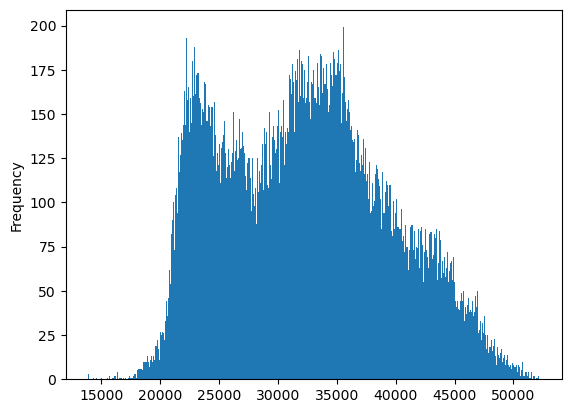

In [216]:
train['PowerConsumption_Zone1'].plot(kind='hist', bins=500)

<AxesSubplot:xlabel='Datetime'>

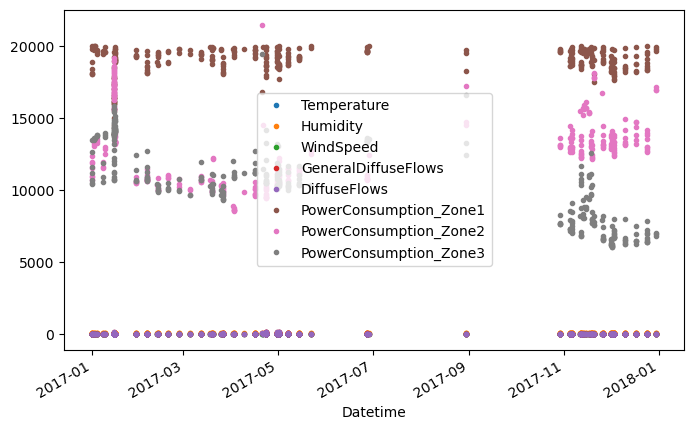

In [217]:
train.query('PowerConsumption_Zone1 < 20_000').plot(figsize=(8, 5), style = '.')

<AxesSubplot:xlabel='Datetime'>

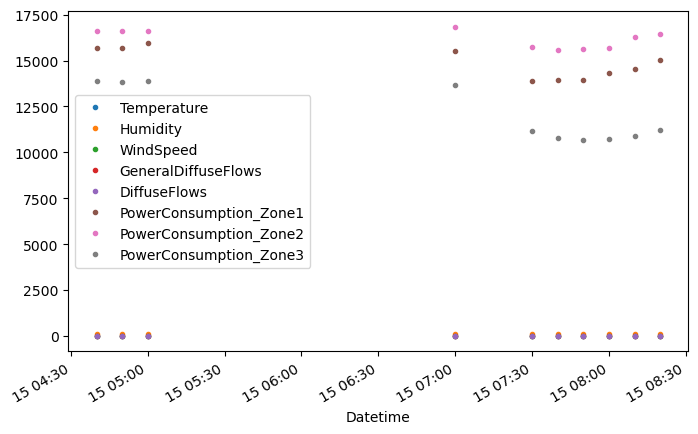

In [218]:
train.query('PowerConsumption_Zone1 < 16_000').plot(figsize=(8, 5), style = '.')



In [219]:
train = train.query('PowerConsumption_Zone1 > 19_000').copy()

<AxesSubplot:ylabel='Frequency'>

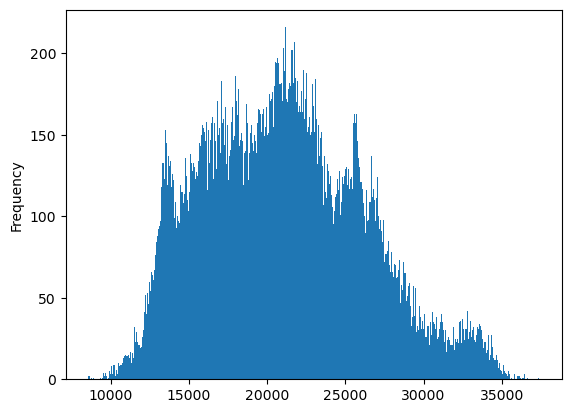

In [220]:
train['PowerConsumption_Zone2'].plot(kind='hist', bins=500)

<AxesSubplot:xlabel='Datetime'>

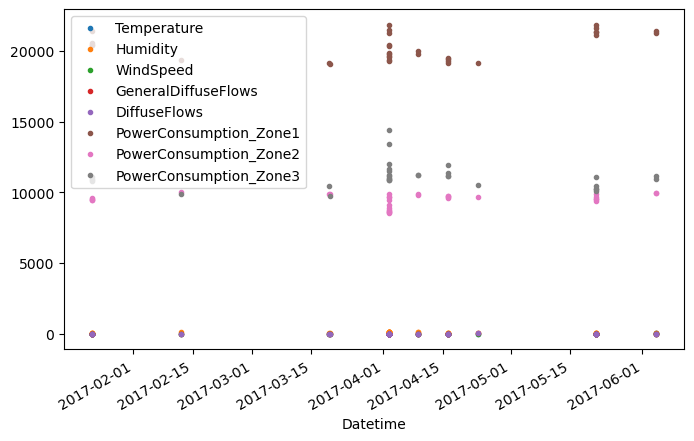

In [221]:
train.query('PowerConsumption_Zone2 < 10_000').plot(figsize=(8, 5), style = '.')

<AxesSubplot:xlabel='Datetime'>

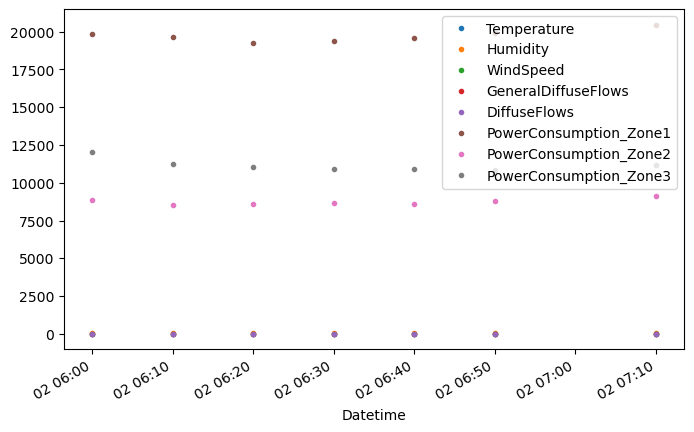

In [222]:
train.query('PowerConsumption_Zone2 < 9_300').plot(figsize=(8, 5), style = '.')

In [223]:
train = train.query('PowerConsumption_Zone2 > 9_300').copy()

<AxesSubplot:ylabel='Frequency'>

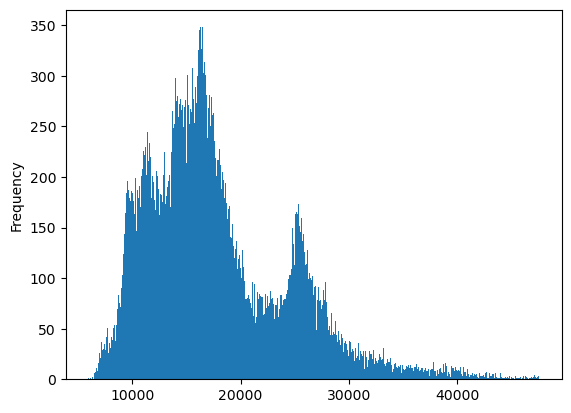

In [224]:
train['PowerConsumption_Zone3'].plot(kind='hist', bins=500)

<AxesSubplot:xlabel='Datetime'>

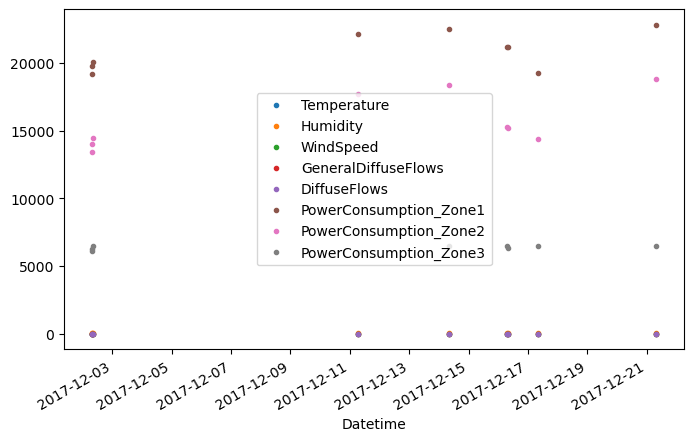

In [225]:
train.query('PowerConsumption_Zone3 < 6_500').plot(figsize=(8, 5), style = '.')


In [226]:
train = train.query('PowerConsumption_Zone3 > 6_500').copy()

## Feature Creation

In [227]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

train = create_features(train)

In [228]:
train.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,6,1,1,2017,1,1,52
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0,6,1,1,2017,1,1,52
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0,6,1,1,2017,1,1,52
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0,6,1,1,2017,1,1,52
2017-01-01 00:50:00,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048,0,6,1,1,2017,1,1,52


In [229]:
def add_lags(df):
    target_map = df['PowerConsumption_Zone1'].to_dict()
    df['lag1'] = (df.index - pd.Timedelta('30 days')).map(target_map)
    return df

In [230]:
train = add_lags(train)


In [231]:
def add_lags1(df):
    target_map = df['PowerConsumption_Zone2'].to_dict()
    df['lag2'] = (df.index - pd.Timedelta('30 days')).map(target_map)
    return df

In [232]:
train = add_lags1(train)


In [233]:
def add_lags2(df):
    target_map = df['PowerConsumption_Zone3'].to_dict()
    df['lag3'] = (df.index - pd.Timedelta('30 days')).map(target_map)
    return df

In [234]:
train = add_lags2(train)


In [235]:
train

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3
Datetime,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,6,1,1,2017,1,1,52,NaN,NaN,NaN
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0,6,1,1,2017,1,1,52,NaN,NaN,NaN
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0,6,1,1,2017,1,1,52,NaN,NaN,NaN
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0,6,1,1,2017,1,1,52,NaN,NaN,NaN
2017-01-01 00:50:00,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048,0,6,1,1,2017,1,1,52,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 23:00:00,7.070,72.5,0.080,0.059,0.093,32158.17490,27273.39675,14987.75510,23,5,4,12,2017,364,30,52,32067.69231,26427.27273,13607.71084
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,23,5,4,12,2017,364,30,52,31347.69231,25705.78512,13301.20482
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,23,5,4,12,2017,364,30,52,30603.07692,25088.42975,13081.44578


## Visualize our feature/target relationship

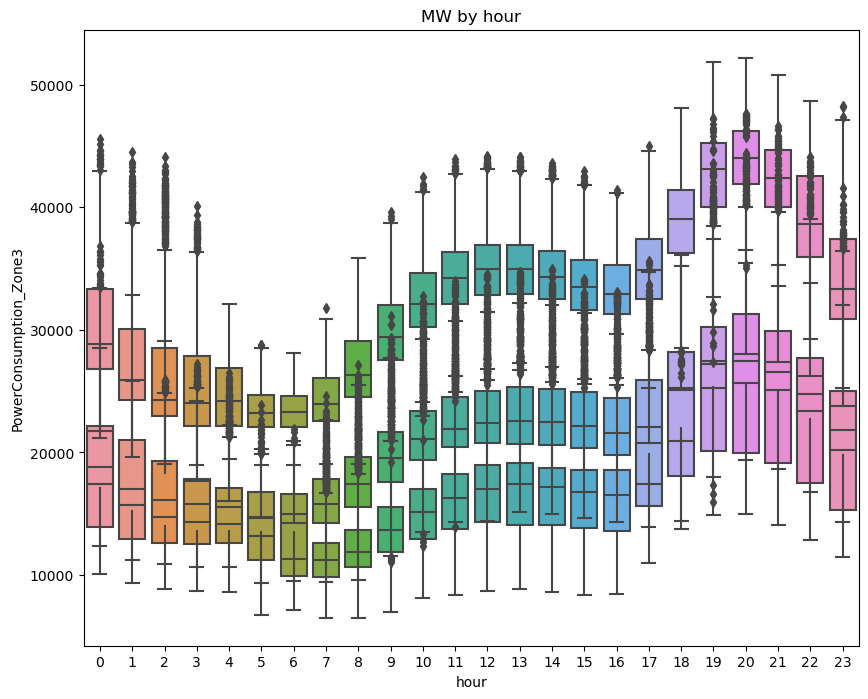

In [236]:
fig,ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=train, x='hour', y='PowerConsumption_Zone1')
sns.boxplot(data=train, x='hour', y='PowerConsumption_Zone2')
sns.boxplot(data=train, x='hour', y='PowerConsumption_Zone3')


ax.set_title('MW by hour')
plt.show()

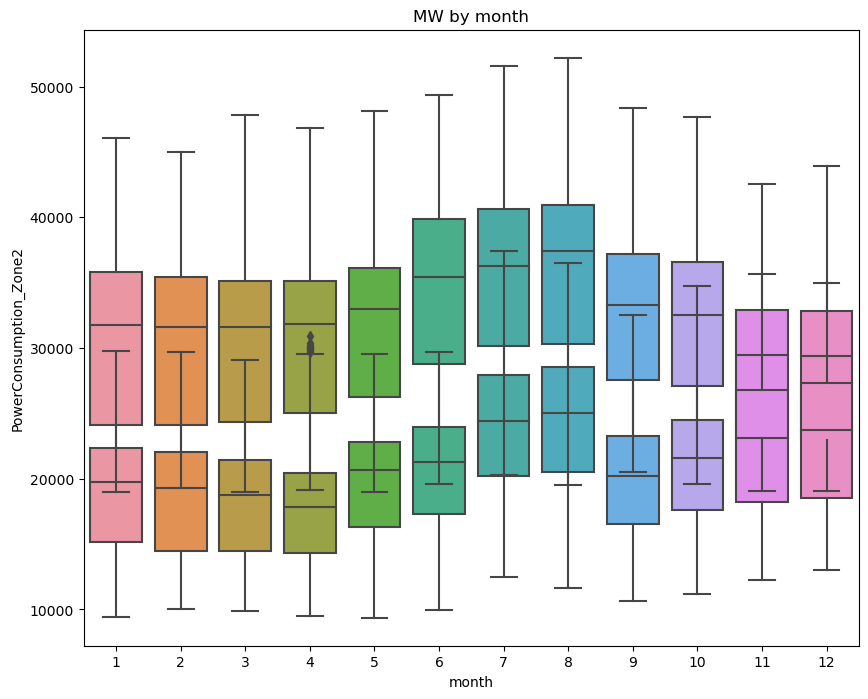

In [237]:
fig,ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=train, x='month', y='PowerConsumption_Zone1')
sns.boxplot(data=train, x='month', y='PowerConsumption_Zone2')



ax.set_title('MW by month')
plt.show()

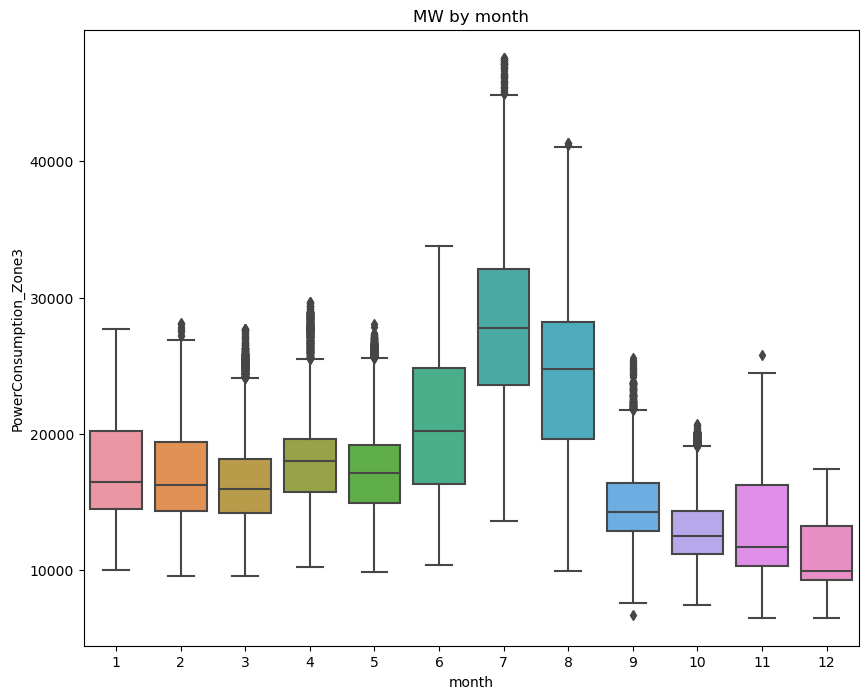

In [238]:
fig,ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=train, x='month', y='PowerConsumption_Zone3')



ax.set_title('MW by month')
plt.show()

In [239]:
test = pd.read_csv('test_data.csv')

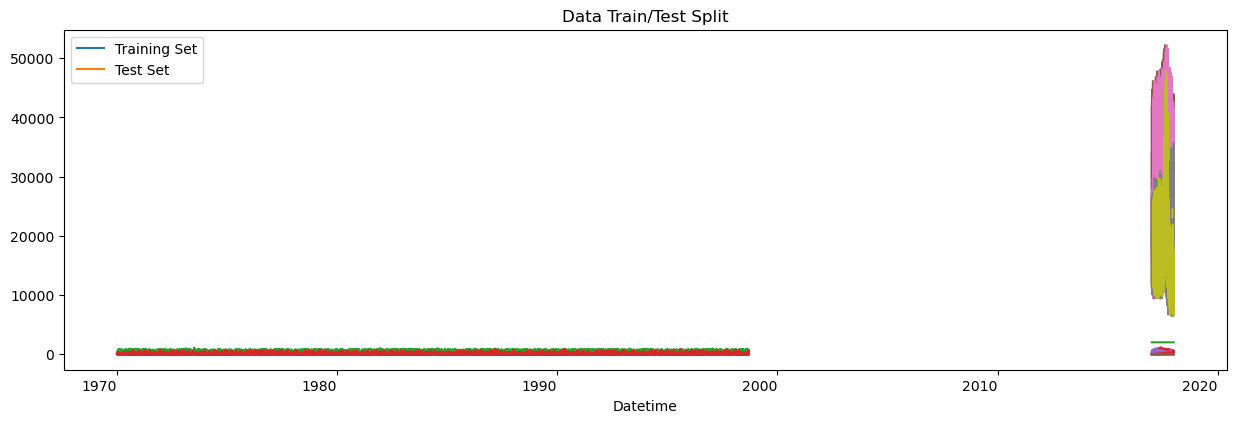

In [240]:
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training set',title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [241]:
train.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3
Datetime,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,6,1,1,2017,1,1,52,NaN,NaN,NaN
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0,6,1,1,2017,1,1,52,NaN,NaN,NaN
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0,6,1,1,2017,1,1,52,NaN,NaN,NaN
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0,6,1,1,2017,1,1,52,NaN,NaN,NaN
2017-01-01 00:50:00,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048,0,6,1,1,2017,1,1,52,NaN,NaN,NaN


##  Time Series Cross Validation


In [184]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=5, test_size=10*12*1, gap=24)
train = train.sort_index()

In [188]:
train.columns

Index(['Datetime', 'predicted_Zone1', 'predicted_Zone2', 'predicted_Zone3'], dtype='object')

IndexError: positional indexers are out-of-bounds

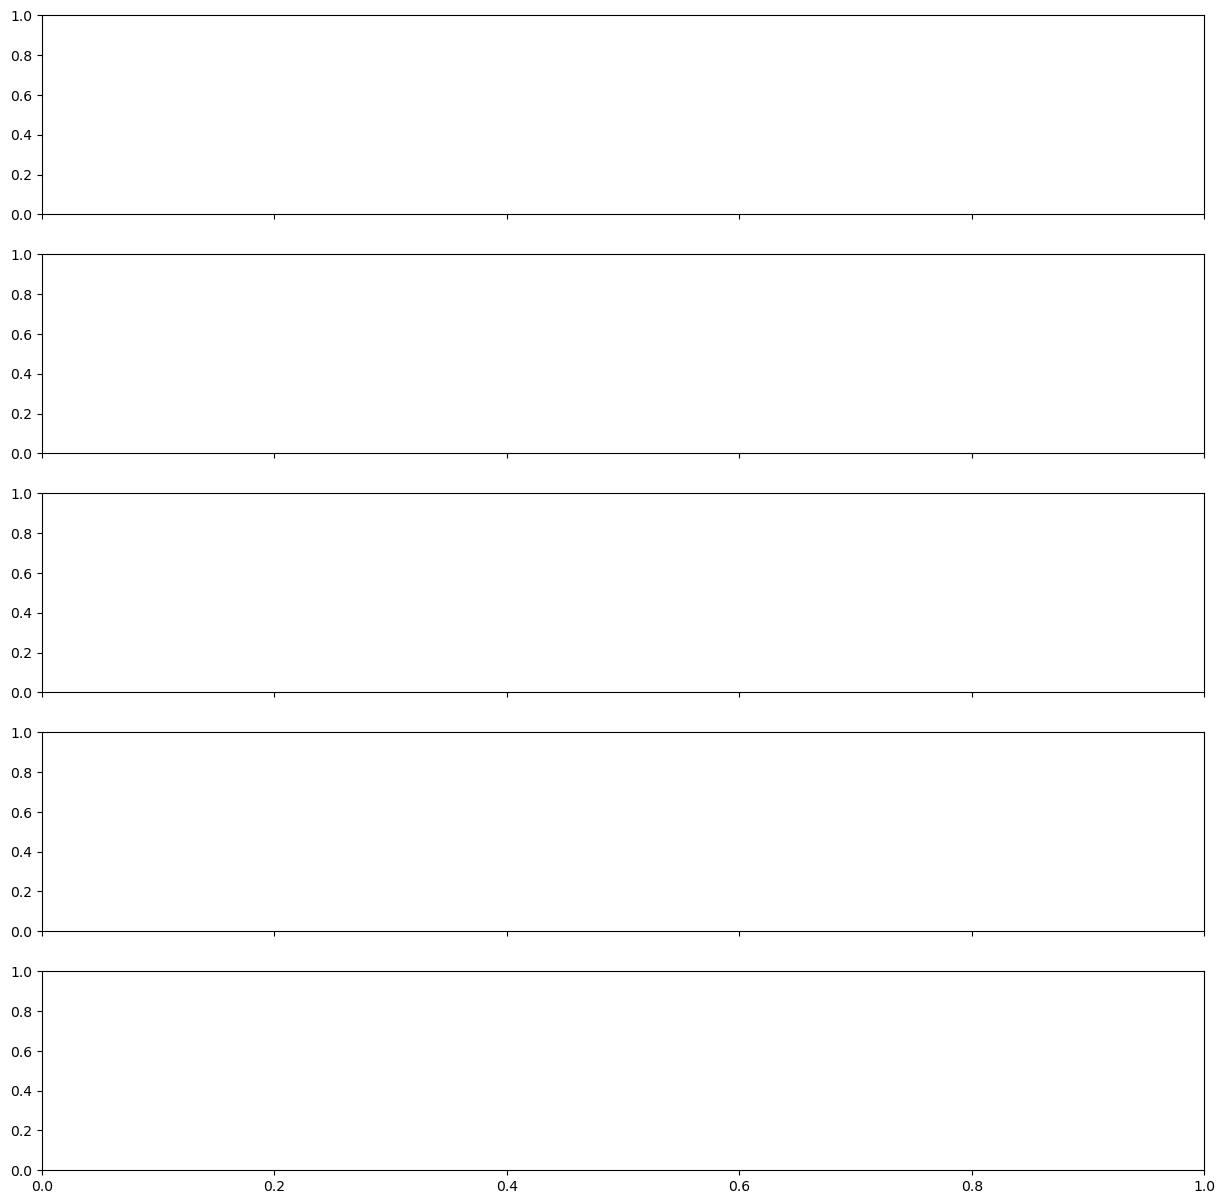

In [191]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = train.iloc[train_idx]
    test = test.iloc[val_idx]
    train['PowerConsumption_Zone1'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['PowerConsumption_Zone1'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

## Feature Importance


<AxesSubplot:xlabel='Month'>

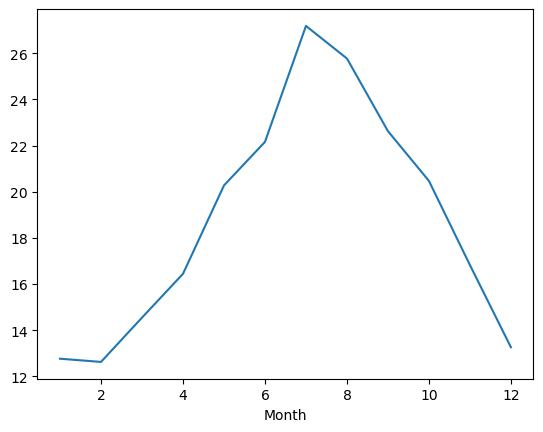

In [294]:
train.groupby('Month')['Temperature'].mean().plot()

<AxesSubplot:xlabel='Month'>

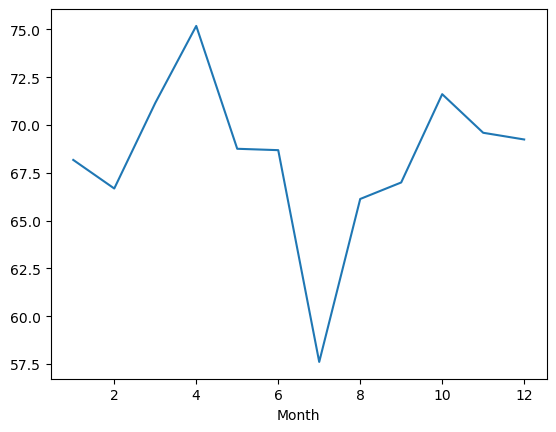

In [305]:
train.groupby('Month')['Humidity'].mean().plot()

<AxesSubplot:xlabel='Month'>

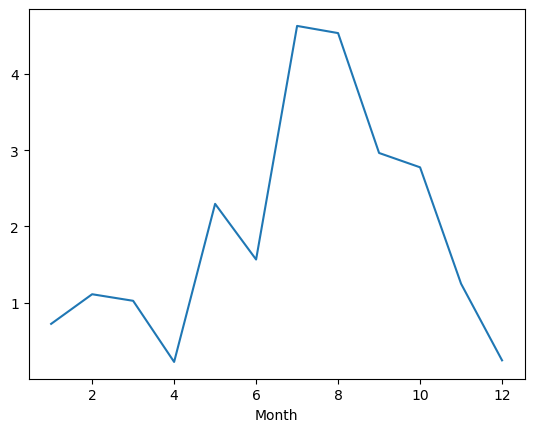

In [279]:
train.groupby('Month')['WindSpeed'].mean().plot()

<AxesSubplot:xlabel='Month'>

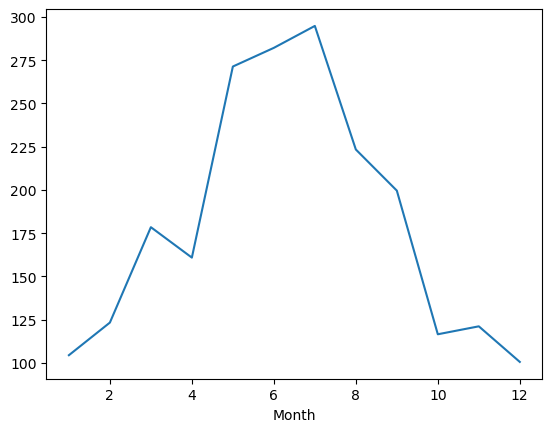

In [280]:
train.groupby('Month')['GeneralDiffuseFlows'].mean().plot()

<AxesSubplot:xlabel='Month'>

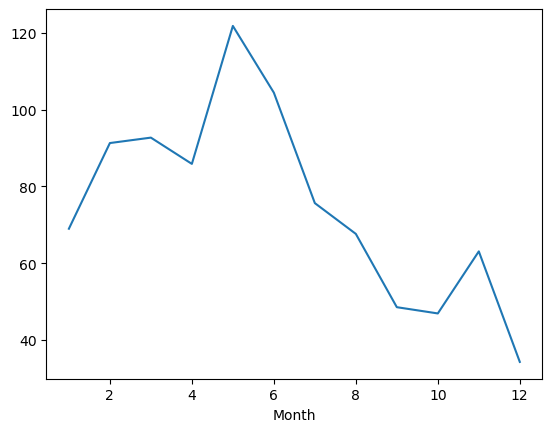

In [281]:
train.groupby('Month')['DiffuseFlows'].mean().plot()

In [282]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

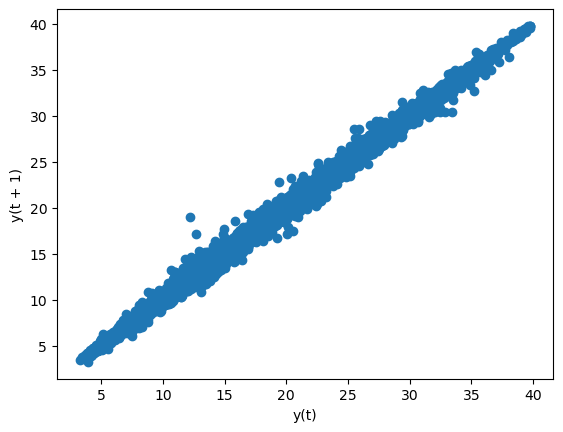

In [283]:
lag_plot(train['Temperature'])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

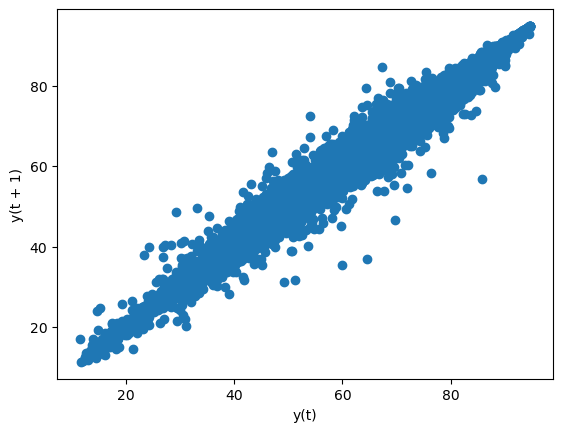

In [284]:
lag_plot(train['Humidity'])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

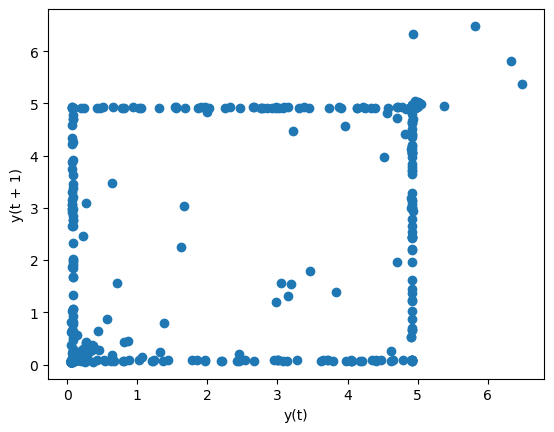

In [285]:
lag_plot(train['WindSpeed'])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

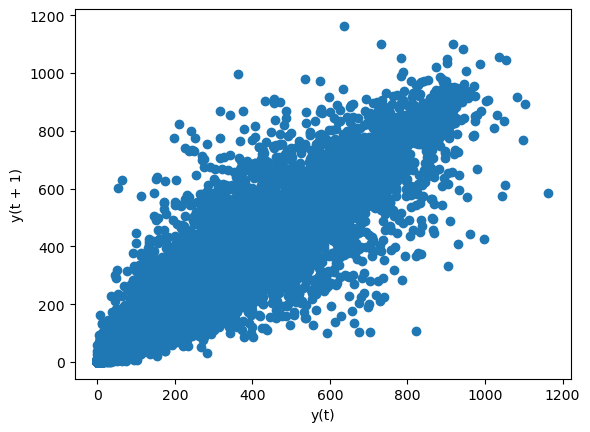

In [286]:
lag_plot(train['GeneralDiffuseFlows'])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

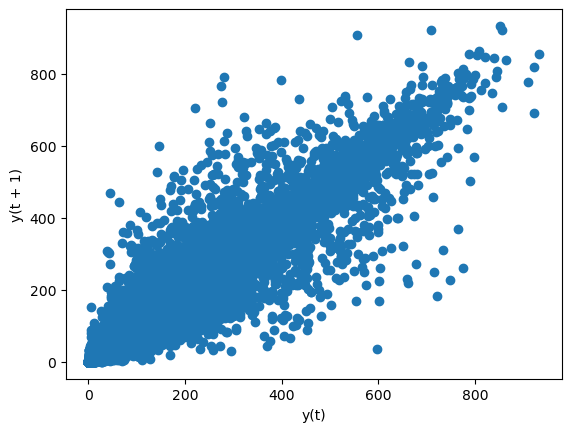

In [287]:
lag_plot(train['DiffuseFlows'])

In [267]:
train = train.loc[train.index < '09-09-2017']
test = train.loc[train.index >= '09-09-2017']

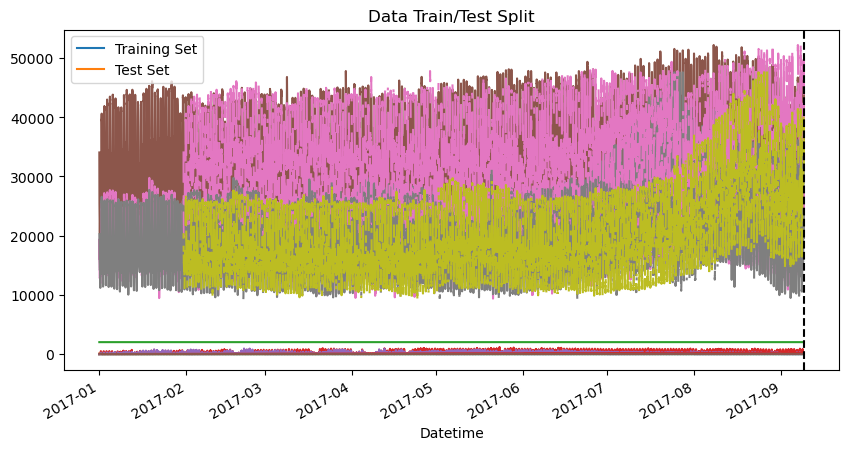

In [268]:
fig, ax = plt.subplots(figsize=(10, 5))
train.plot(ax=ax, label='Training set',title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('09-09-2017', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

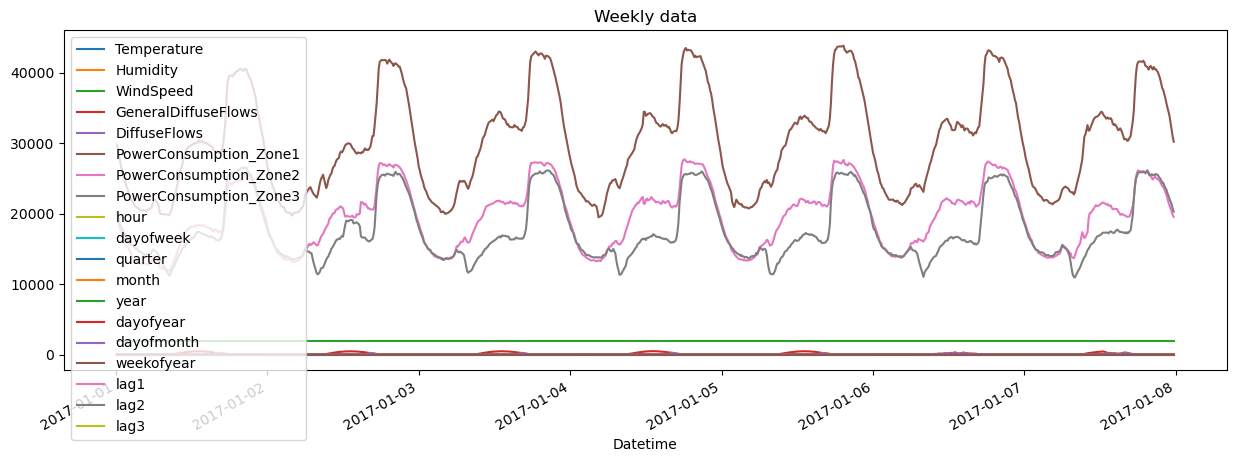

In [266]:
train.loc[(train.index > '01-01-2017') & (train.index < '01-08-2017')].plot(figsize=(15,5), title='Weekly data')
plt.show()

In [269]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=5, test_size=24*365*1, gap=24)
df = df.sort_index()

In [270]:
train.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2',
       'PowerConsumption_Zone3', 'hour', 'dayofweek', 'quarter', 'month',
       'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'lag1', 'lag2',
       'lag3'],
      dtype='object')

In [256]:
test.tail()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
Datetime,,,,,
9/9/2017 6:00,19.81,87.7,0.321,0.077,0.089
9/9/2017 6:30,19.85,87.2,0.328,0.102,0.126
9/9/2017 7:00,19.78,86.0,0.307,2.892,2.271
9/9/2017 8:20,21.28,84.5,0.283,81.200,62.830
9/9/2017 9:00,22.58,83.1,0.286,278.400,110.400


In [276]:
train = create_features(train)
test = create_features(test)

In [277]:
train.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2',
       'PowerConsumption_Zone3', 'hour', 'dayofweek', 'quarter', 'month',
       'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'lag1', 'lag2',
       'lag3'],
      dtype='object')

In [278]:
features=['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows','hour', 'dayofweek', 'quarter', 'month',
       'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'lag1', 'lag2',
       'lag3']
target = ['PowerConsumption_Zone1', 'PowerConsumption_Zone2',
       'PowerConsumption_Zone3']

In [279]:
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [282]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50,
                      learning_rate = 0.01)
reg.fit(X_train, y_train , 
       eval_set =[(X_train, y_train), (X_test, y_test)],
        verbose=100
       )

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:weekofyear: UInt32